Análisis exploratorio y limpieza de datos del dataset fast_food_consumption_healt_impact_dataset.csv

-Análisis estadístico básico
-visualización de datos
-correlación de variables

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('fast_food_consumption_health_impact_dataset.csv')
df.head().transpose()

0     1       2       3       4
Age                                 56    46      32      25      38
Gender                            Male  Male  Female  Female  Female
Fast_Food_Meals_Per_Week             1    12       8       6      14
Average_Daily_Calories            3153  1748    3020    2621    2260
BMI                               28.4  22.8    21.5    26.8    18.1
Physical_Activity_Hours_Per_Week   4.5   9.6     4.0     8.4     1.9
Sleep_Hours_Per_Day                7.8   6.7     7.4     6.1     7.7
Energy_Level_Score                   9     2       2       6       7
Digestive_Issues                    No    No     Yes      No      No
Doctor_Visits_Per_Year               7     4       7       7       5
Overall_Health_Score                 5     3       4       8       4

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               800 non-null    int64  
 1   Gender                            800 non-null    object 
 2   Fast_Food_Meals_Per_Week          800 non-null    int64  
 3   Average_Daily_Calories            800 non-null    int64  
 4   BMI                               800 non-null    float64
 5   Physical_Activity_Hours_Per_Week  800 non-null    float64
 6   Sleep_Hours_Per_Day               800 non-null    float64
 7   Energy_Level_Score                800 non-null    int64  
 8   Digestive_Issues                  800 non-null    object 
 9   Doctor_Visits_Per_Year            800 non-null    int64  
 10  Overall_Health_Score              800 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 68.9+ KB


In [6]:
# el dataset no tiene valores nulos,, bien ordenado
dup=df.duplicated()
print(df[dup])

Empty DataFrame
Columns: [Age, Gender, Fast_Food_Meals_Per_Week, Average_Daily_Calories, BMI, Physical_Activity_Hours_Per_Week, Sleep_Hours_Per_Day, Energy_Level_Score, Digestive_Issues, Doctor_Visits_Per_Year, Overall_Health_Score]
Index: []


In [ ]:
#tampoco duplicados

In [4]:
num_cols=df.select_dtypes(include=['int64','float64'])
cat_cols=df.select_dtypes(include=['object'])

In [5]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            800 non-null    object
 1   Digestive_Issues  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


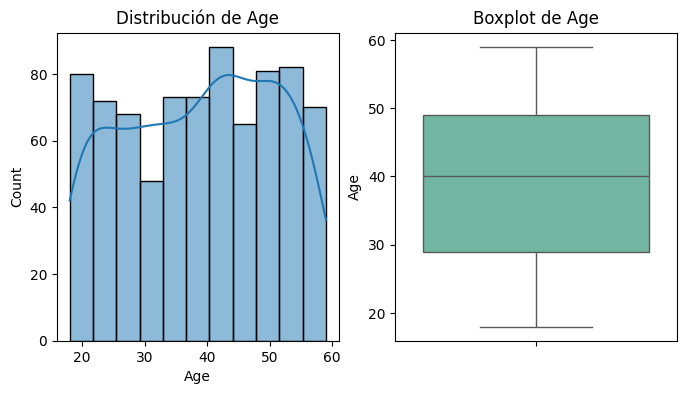

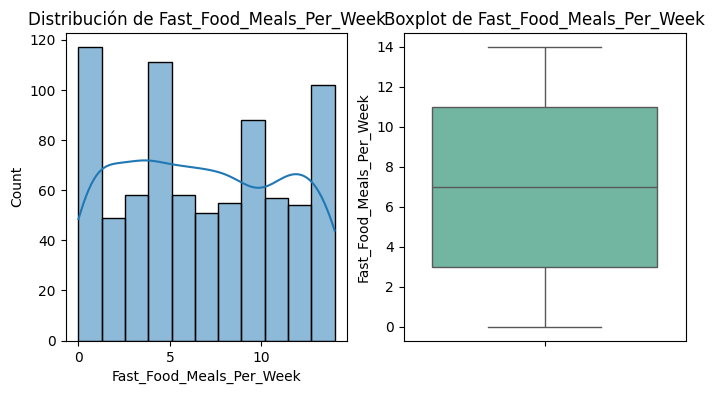

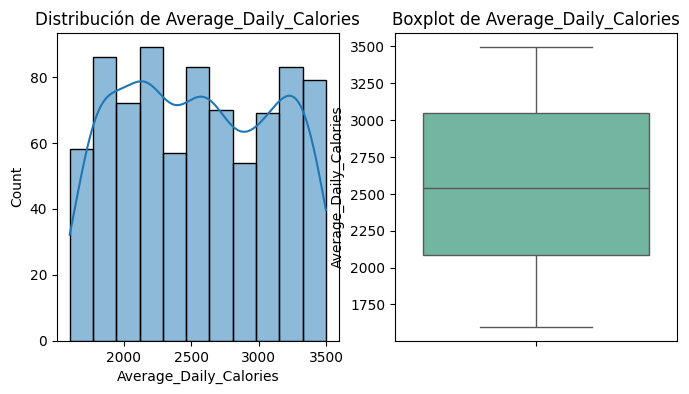

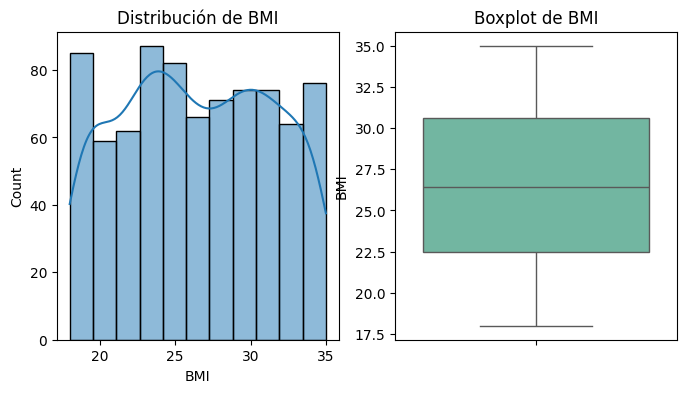

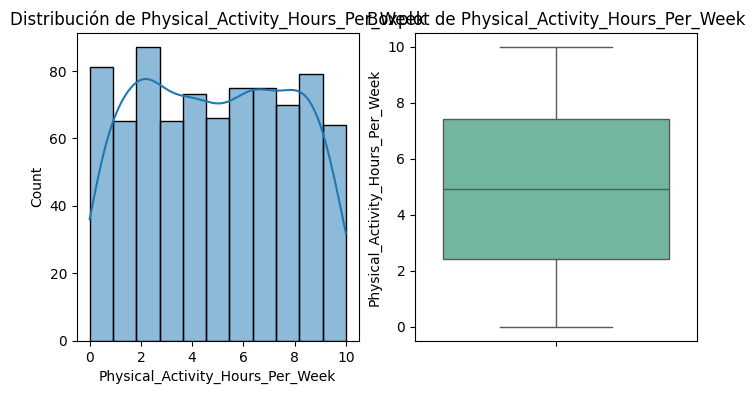

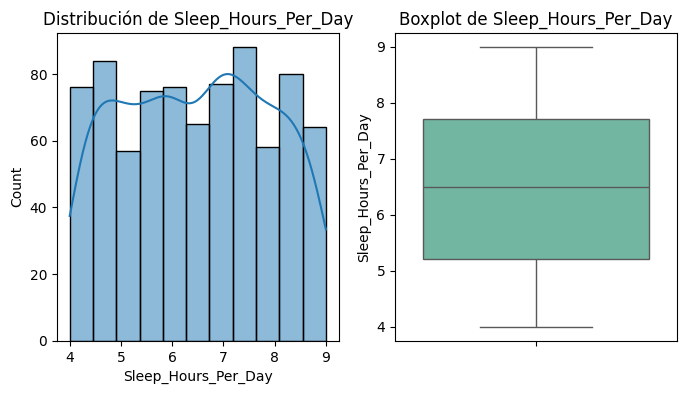

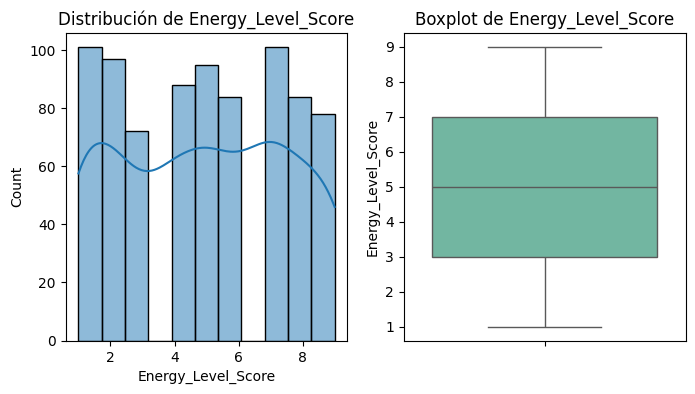

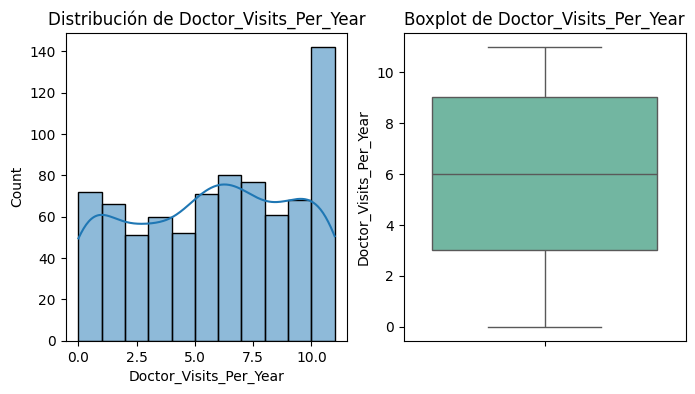

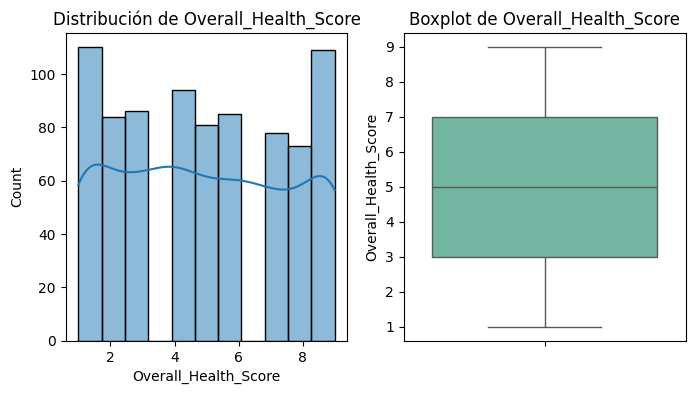

In [6]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,palette='Set3')
    plt.title(f'Distribución de {col}')

    plt.subplot(1,2,2)
    sns.boxplot(y=df[col],palette='Set2')
    plt.title(f'Boxplot de {col}')
    plt.show

In [9]:
print(f'La mayoría de participantes tienen edad {df['Age'].value_counts().head(1)}')
df['Age'].value_counts().head()

La mayoría de participantes tienen edad Age
45    28
Name: count, dtype: int64


In [12]:
df['Age'].value_counts()

Age
45    28
43    28
50    27
52    27
49    25
18    24
56    23
22    23
41    23
40    22
54    22
19    21
25    21
29    21
42    21
33    21
20    20
53    20
34    20
46    19
39    19
36    18
38    18
47    18
26    17
31    17
59    16
58    16
30    16
44    16
28    16
51    16
21    15
32    15
57    15
23    15
35    14
27    14
37    14
48    13
24    13
55    13
Name: count, dtype: int64

distribución de Gender:
Gender
Male      0.48125
Female    0.47625
Other     0.04250
Name: proportion, dtype: float64


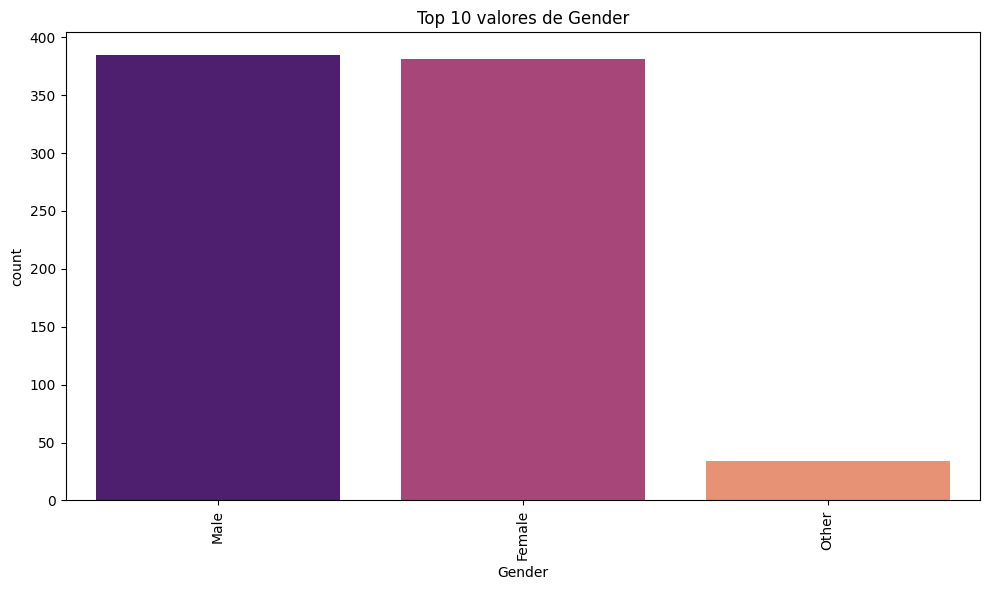

distribución de Digestive_Issues:
Digestive_Issues
No     0.62125
Yes    0.37875
Name: proportion, dtype: float64


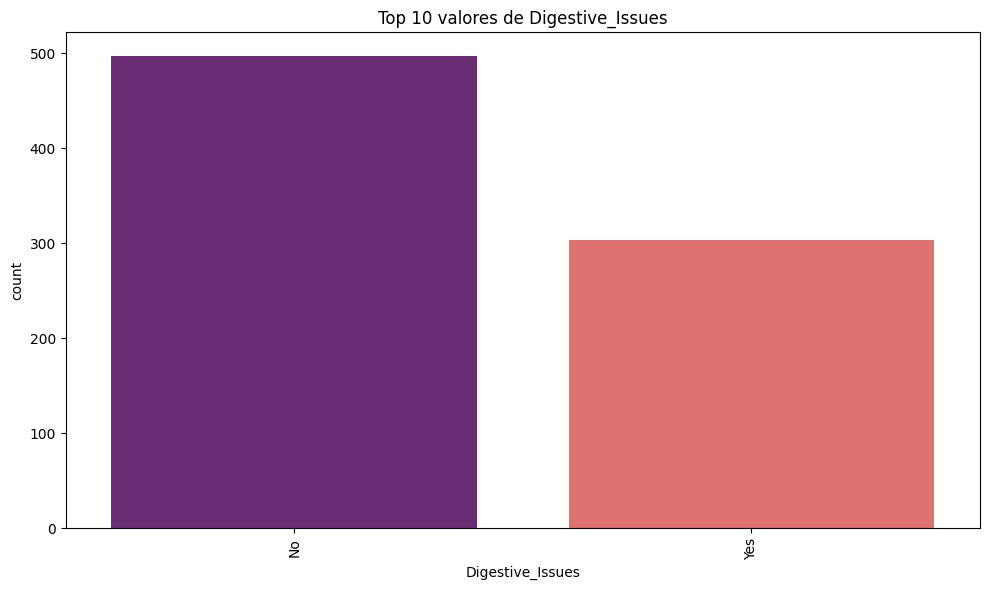

In [13]:
for column in cat_cols:
    print(f'distribución de {column}:')
    print(df[column].value_counts(normalize=True).head(10))

    top_cat=df[column].value_counts().head(10).index.tolist()

    temp_filt=df[df[column].isin(top_cat)].copy()

     # Crear el gráfico
    plt.figure(figsize=(10, 6))
    
    # Ordenar las categorías por frecuencia (opcional pero recomendado)
    order = temp_filt[column].value_counts().index
    
    sns.countplot(x=column, data=temp_filt, order=order,palette='magma')
    plt.xticks(rotation=90)
    plt.title(f'Top 10 valores de {column}')
    plt.tight_layout()
    plt.show()

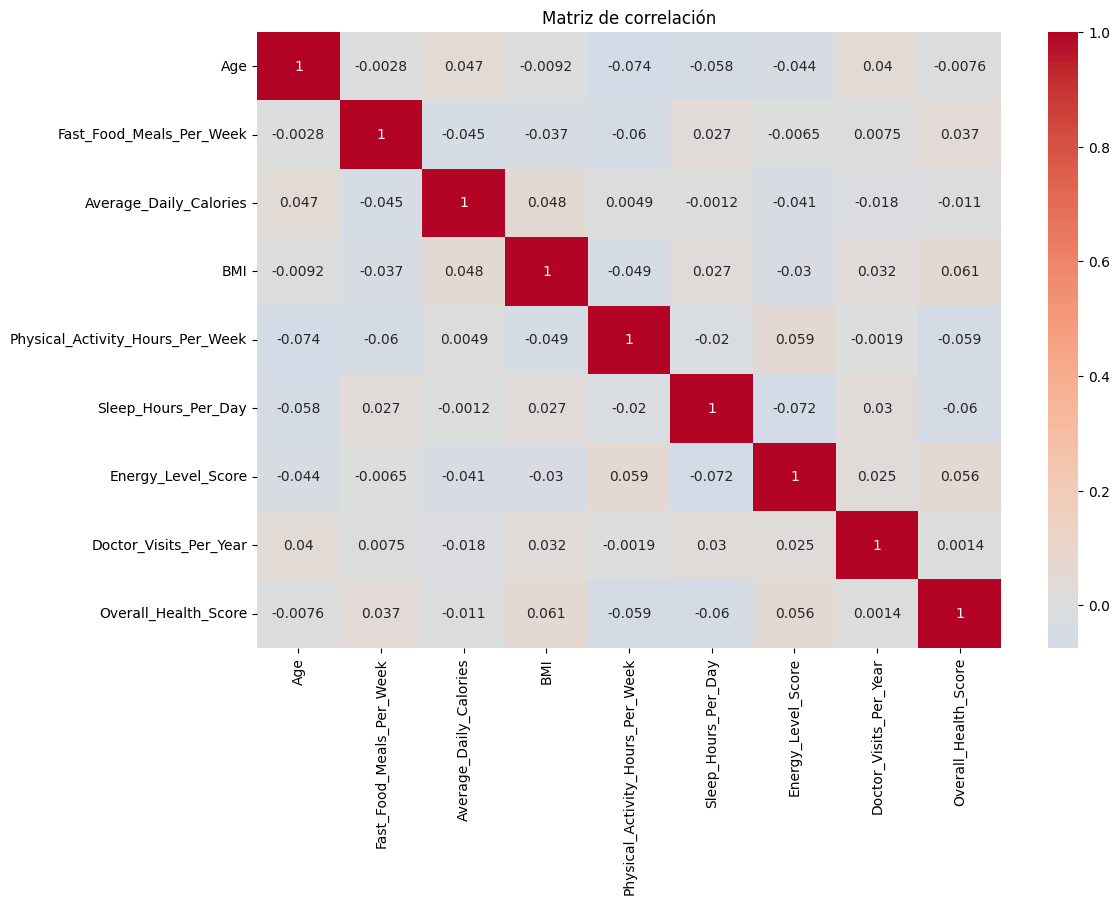

In [13]:
if len(num_cols)>1:
    plt.figure(figsize=(12,8))
    sns.heatmap(num_cols.corr(),annot=True,cmap='coolwarm',center=0)
    plt.title('Matriz de correlación')
    plt.show()

NO SE OBSERVA CORRELACIÓN DIRECTA ENTRE LAS VARIABLES NUMÉRICAS
sin embargo puede observarse que los valores de correlación más grandes se dan para las columnas
BMI & Overall_Health_Score  (0.061)
Physical_activity_hours_per_week & Energy Level_Score (0.059)
Overall_Health_score & Energy Level Score  (0.056)


In [24]:
#Se cambia l tipo de datos de las columnas 'Gender' y 'Digestive_Issues' a tipo categórico

df['Gender']=df['Gender'].astype('category')
df['Digestive_Issues']=df['Digestive_Issues'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Age                               800 non-null    int64   
 1   Gender                            800 non-null    category
 2   Fast_Food_Meals_Per_Week          800 non-null    int64   
 3   Average_Daily_Calories            800 non-null    int64   
 4   BMI                               800 non-null    float64 
 5   Physical_Activity_Hours_Per_Week  800 non-null    float64 
 6   Sleep_Hours_Per_Day               800 non-null    float64 
 7   Energy_Level_Score                800 non-null    int64   
 8   Digestive_Issues                  800 non-null    category
 9   Doctor_Visits_Per_Year            800 non-null    int64   
 10  Overall_Health_Score              800 non-null    int64   
dtypes: category(2), float64(3), int64(6)
memory usage: 58.2 KB

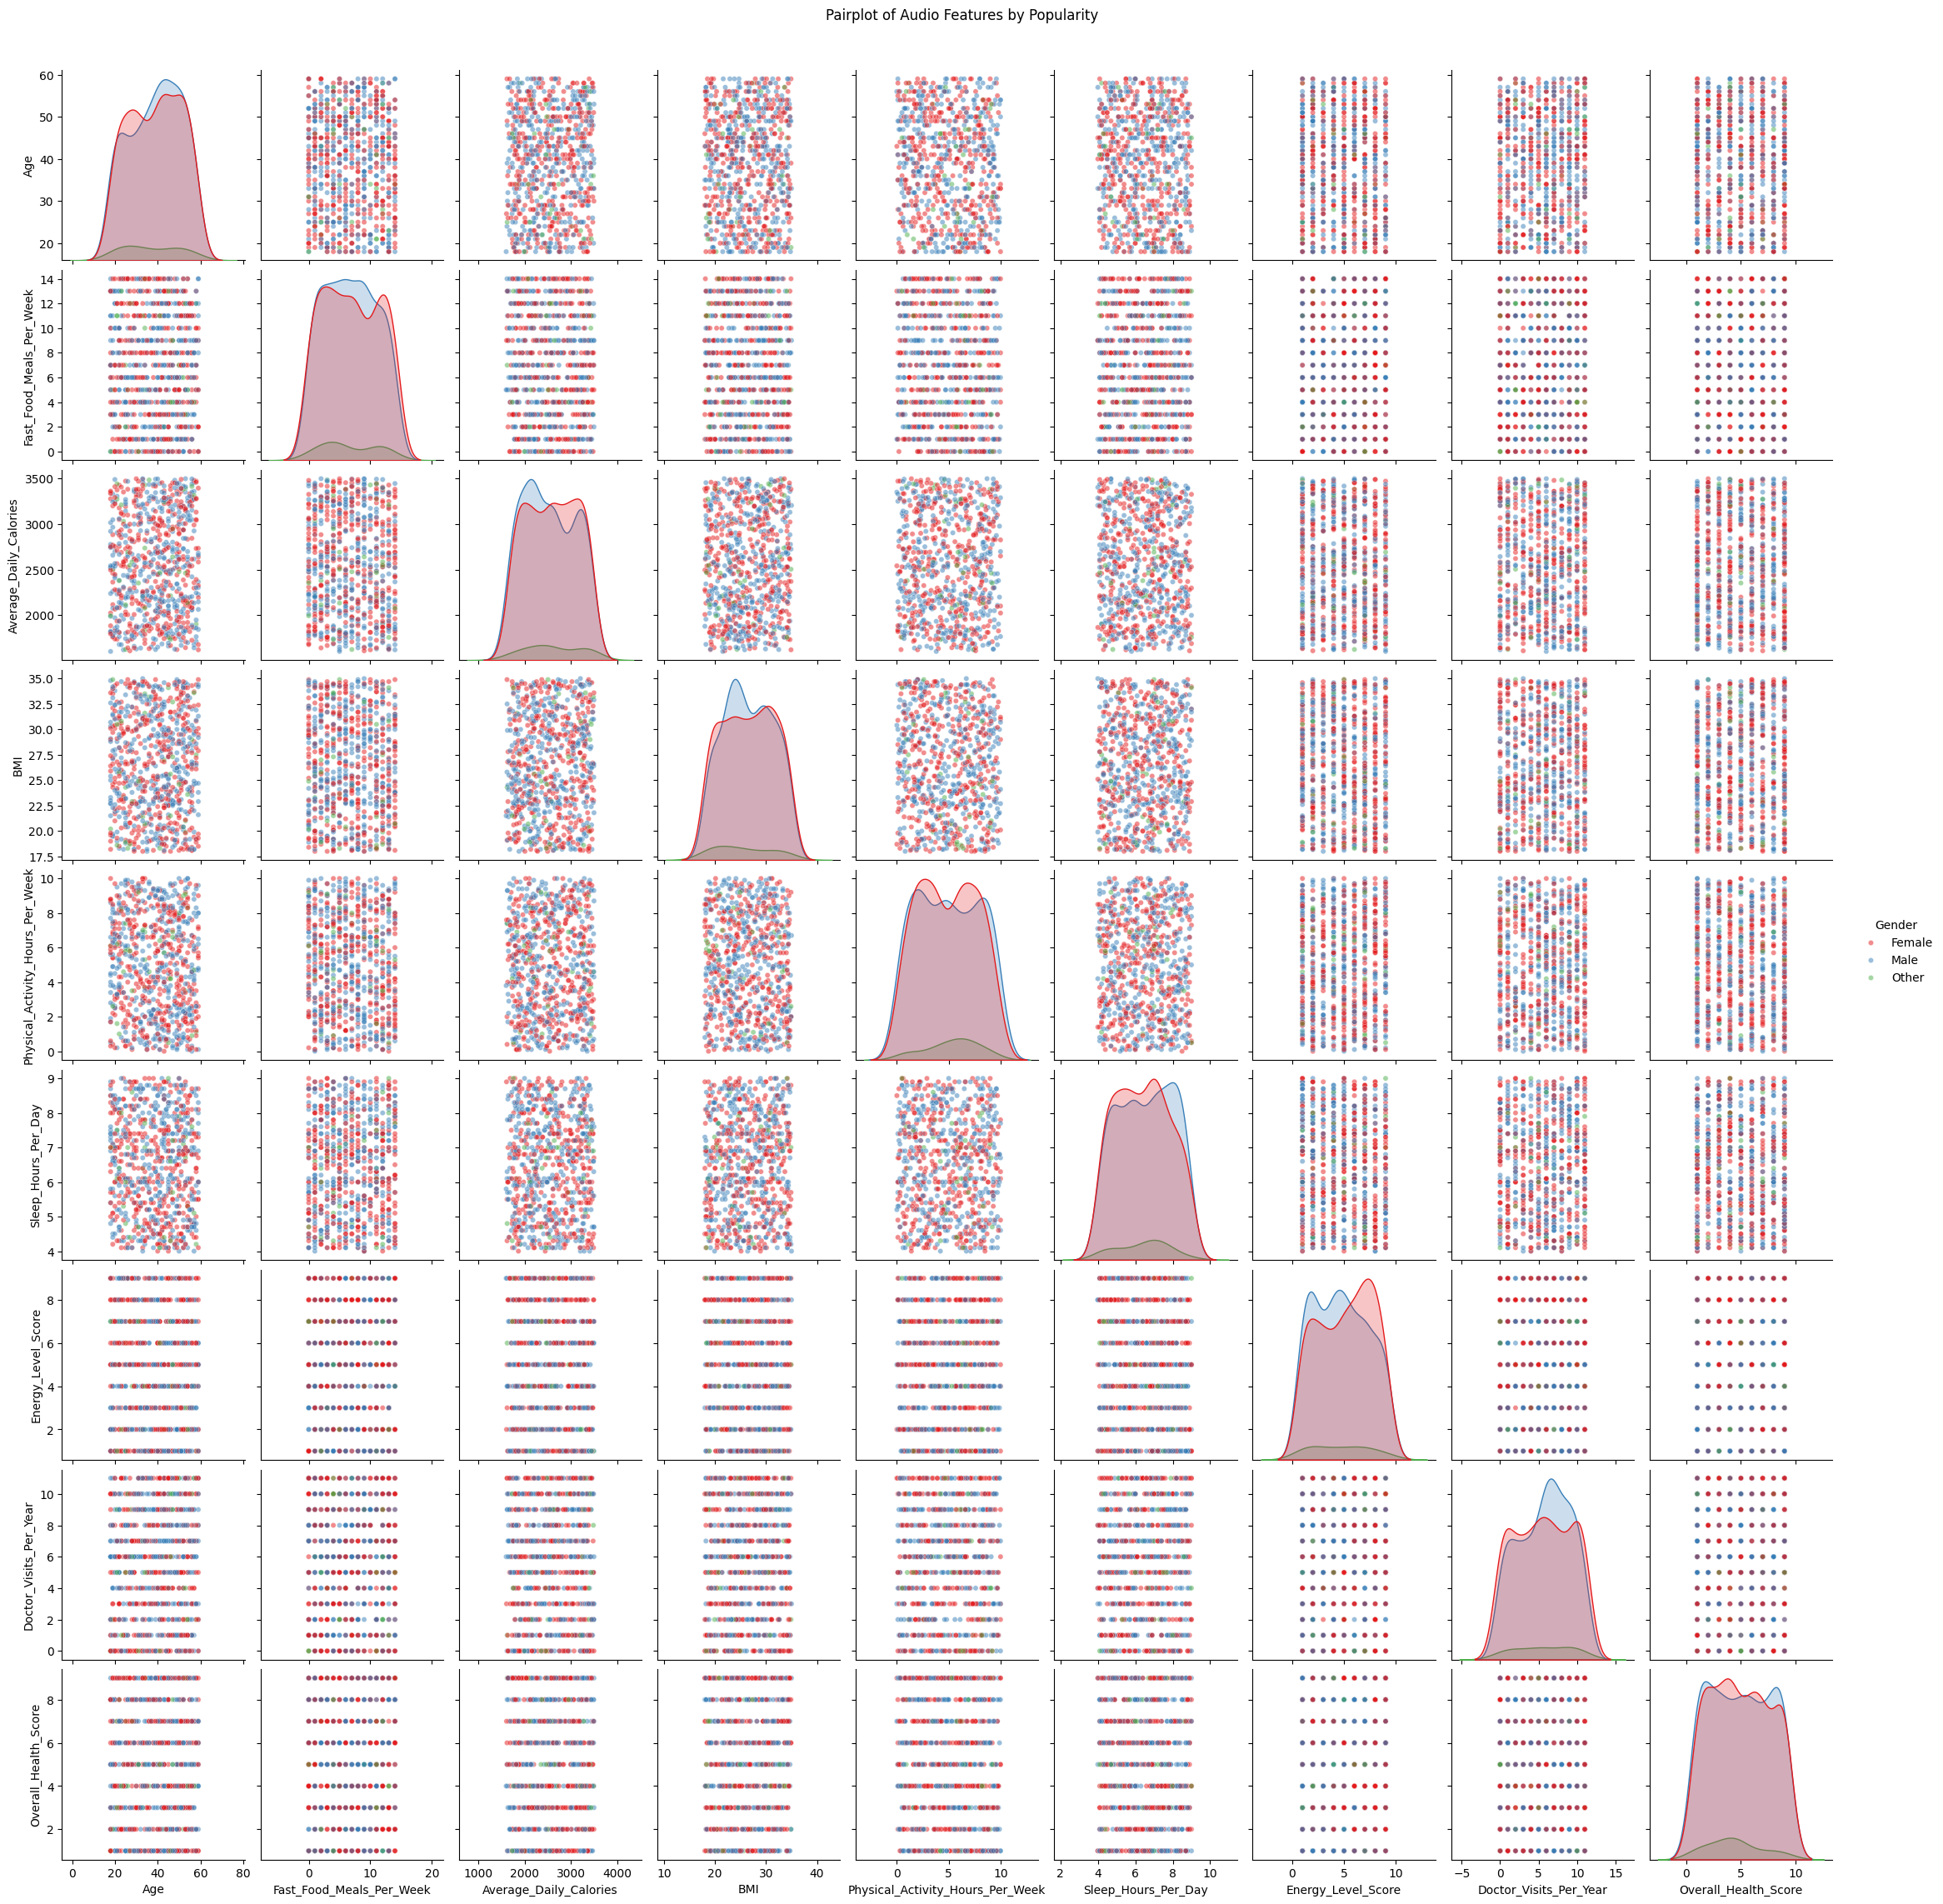

In [29]:
sns.pairplot(df, vars=num_cols, hue='Gender', palette='Set1', diag_kind='kde', plot_kws={'alpha':0.5, 's':20})

plt.suptitle('Pairplot of numeric features by gender', y=1.02)
plt.show()

No se observan patrones claros en el pairplot que nos pueda dar información acerca del comportamiento de las variables dependiendo del género 

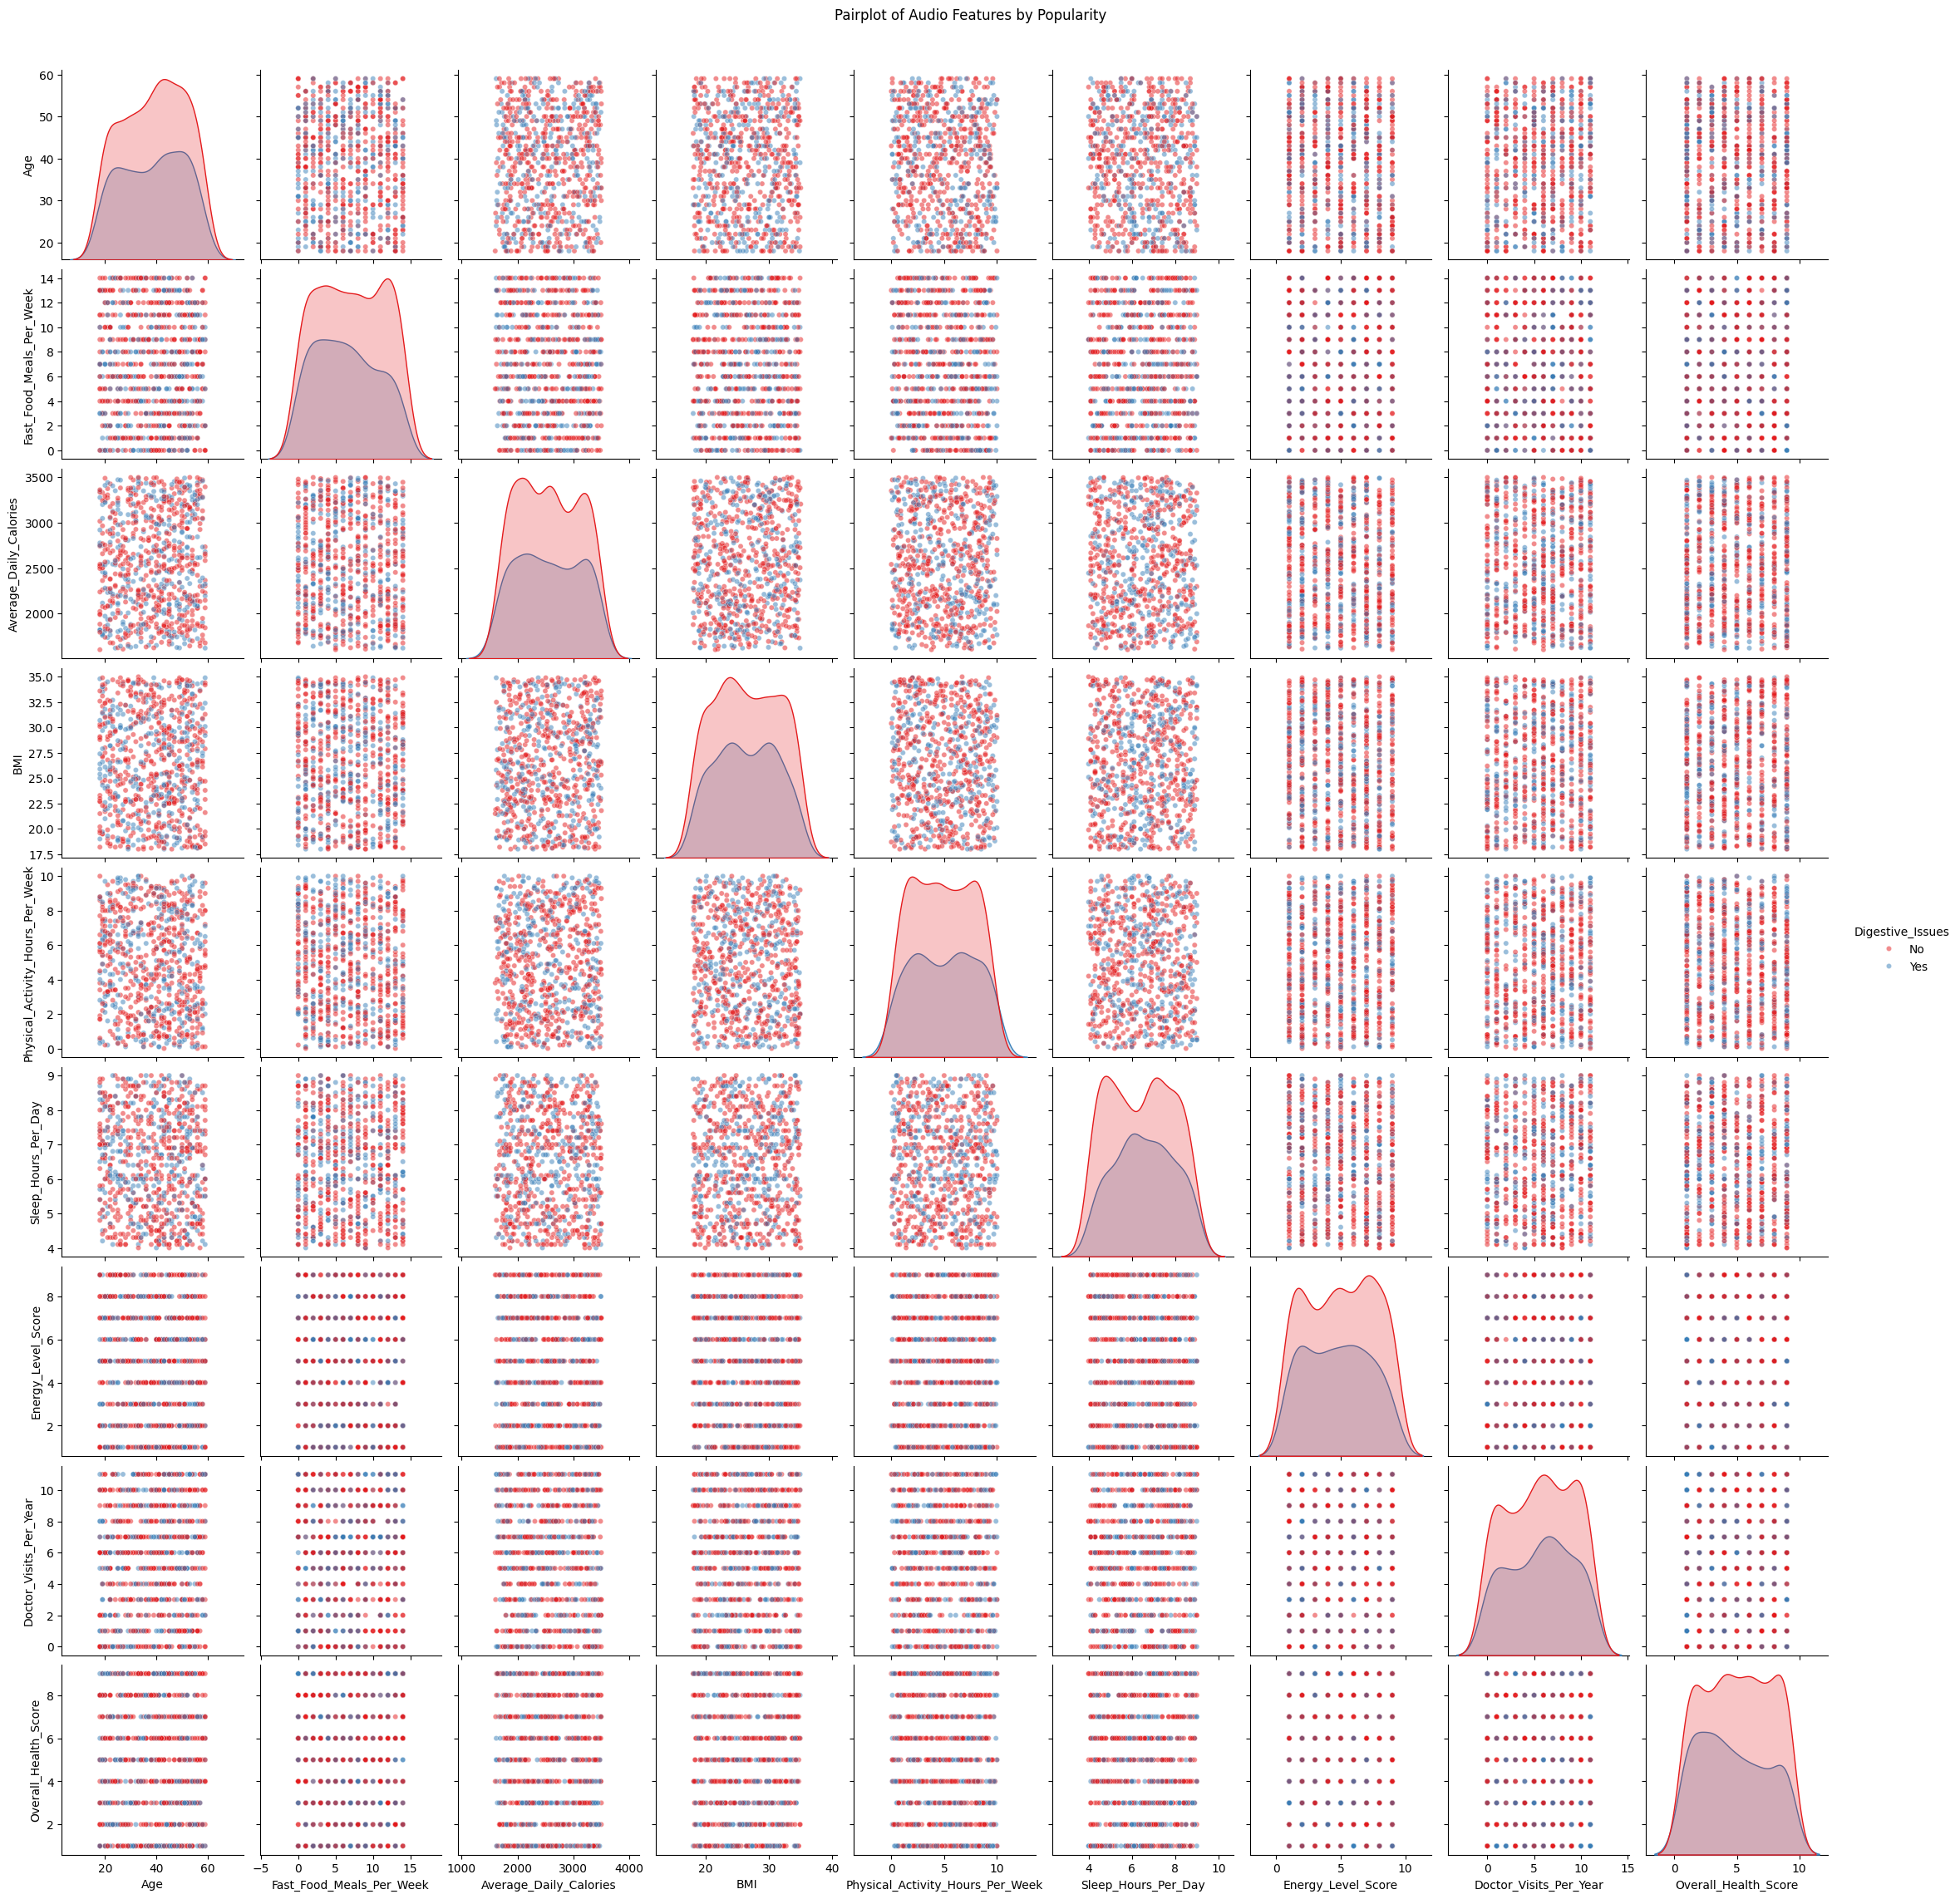

In [30]:

sns.pairplot(df, vars=num_cols, hue='Digestive_Issues', palette='Set1', diag_kind='kde', plot_kws={'alpha':0.5, 's':20})

plt.suptitle('Pairplot of numeric features  by Popularity', y=1.02)
plt.show()

No se observan patrones claros que relacionen las variables con los problemas digestivos.

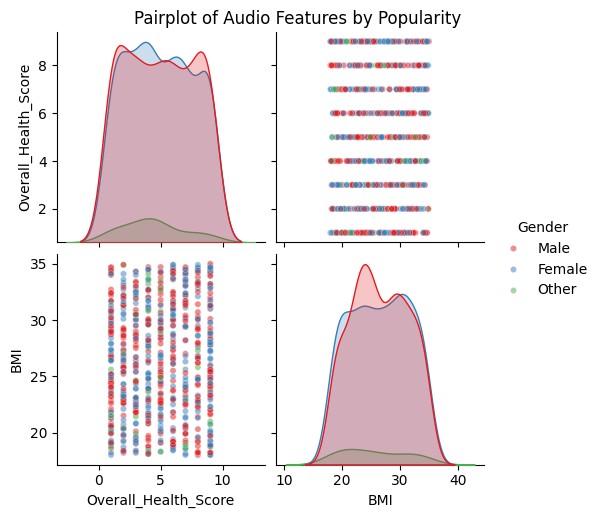

In [18]:
sns.pairplot(df, vars=['Overall_Health_Score','BMI'], hue='Gender',palette='Set1', diag_kind='kde', plot_kws={'alpha':0.5, 's':20})

plt.suptitle('Pairplot of Audio Features by Popularity', y=1.02)
plt.show()